In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:/计算机大三上/大数据分析实践/project/CN-Reanalysis201301/201301/CN-Reanalysis-daily-2013010100.csv")
location = pd.read_csv("经纬度_省市区_final.csv")
location = location.drop(location.columns[[0,-1]],axis=1)

In [3]:
data = data.drop(data.columns[-1],axis=1)
data['风速(m/s)'] = np.sqrt(data[' U(m/s)']**2 + data[' V(m/s)']**2)

In [4]:
data = pd.merge(data,location,how='left',on=[' lat',' lon'])
data = data.drop(columns=[' lat',' lon'])

In [5]:
group = data.groupby(['市','省'])
group_mean = group.mean()
group_mean = pd.DataFrame(group_mean)
group_mean

PM2.5(微克每立方米)   PM10(微克每立方米)   SO2(微克每立方米)   NO2(微克每立方米)  \
市           省                                                                   
[]          []            5.228387       5.823226      2.453871      1.201935   
            中华人民共和国      35.225000      49.620000     21.085000     22.295000   
            台湾省          27.100823      33.538101     11.513987      8.999873   
七台河市        黑龙江省         34.028462      37.815769     10.410769     15.180385   
万宁市         海南省          34.496667      41.508889     12.526667     11.834444   
...                            ...            ...           ...           ...   
黔南布依族苗族自治州  贵州省          35.350598      53.055983     23.299231     19.334274   
黔江区         重庆市          50.686667      57.232500     34.449167      9.667500   
黔西南布依族苗族自治州 贵州省          37.378904      42.527671     14.209863      8.001781   
齐齐哈尔市       黑龙江省         18.105377      20.443065      6.488794      6.983869   
龙岩市         福建省          39.611512      60.740233     37.605698     17.772558   

                      CO(毫克每立方米)   O3(微克每立方米)    U(m/s)    V(m/s)     TEMP(K)  \
市           省                                                                   
[]          []          0.186129    70.227742  2.746129 -1.004516  260.219355   
            中华人民共和国     0.480000    46.910000  0.370000 -2.830000  283.655000   
            台湾省         0.342975    57.101582 -1.324873 -0.575506  281.166266   
七台河市        黑龙江省        0.432308    35.020000  5.970385  0.558077  246.938462   
万宁市         海南省         0.334444    54.098889  0.258889 -6.444444  289.221111   
...                          ...          ...       ...       ...         ...   
黔南布依族苗族自治州  贵州省         0.555043    44.893504 -1.961795 -1.539402  279.888889   
黔江区         重庆市         0.473333    59.871667 -1.055833  0.868333  275.425000   
黔西南布依族苗族自治州 贵州省         0.358904    51.118356 -0.731233 -2.924658  278.275479   
齐齐哈尔市       黑龙江省        0.356281    45.320503  3.316784 -3.575075  241.984874   
龙岩市         福建省         0.606628    46.877907 -0.088721  1.454651  278.666512   

                         RH(%)       PSFC(Pa)   风速(m/s)  
市           省                                            
[]          []       44.733548   70243.622258  5.997136  
            中华人民共和国  48.835000  102068.765000  6.434335  
            台湾省      53.871392   93079.087025  2.983704  
七台河市        黑龙江省     67.864231   98047.666154  6.079725  
万宁市         海南省      80.948889  100445.100000  6.474213  
...                        ...            ...       ...  
黔南布依族苗族自治州  贵州省      54.773333   95517.737863  3.362486  
黔江区         重庆市      39.843333   92264.511667  1.461706  
黔西南布依族苗族自治州 贵州省      49.918493   97226.936438  3.148017  
齐齐哈尔市       黑龙江省     69.201709   99151.619246  4.993570  
龙岩市         福建省      62.677209   87287.446512  2.549610  

[438 rows x 12 columns]

In [6]:
data.iloc[:,8:12]

,TEMP(K),RH(%),PSFC(Pa),风速(m/s)
0,291.54,68.14,100350.11,3.389174
1,291.96,67.41,100546.63,4.697765
2,291.37,69.59,100428.13,5.834664
3,290.74,72.94,100569.27,6.068674
4,291.67,65.97,101620.34,4.012107
...,...,...,...,...
42244,246.32,57.99,98157.16,6.695050
42245,245.23,59.83,96514.89,6.120106
42246,245.50,57.22,96618.52,7.342459
42247,246.06,54.63,97171.19,7.392598


In [7]:
data.iloc[:,0:5].corrwith(data.iloc[:,8:10])

 CO(毫克每立方米)     NaN
 NO2(微克每立方米)    NaN
 PM10(微克每立方米)   NaN
 RH(%)          NaN
 SO2(微克每立方米)    NaN
 TEMP(K)        NaN
PM2.5(微克每立方米)   NaN
dtype: float64

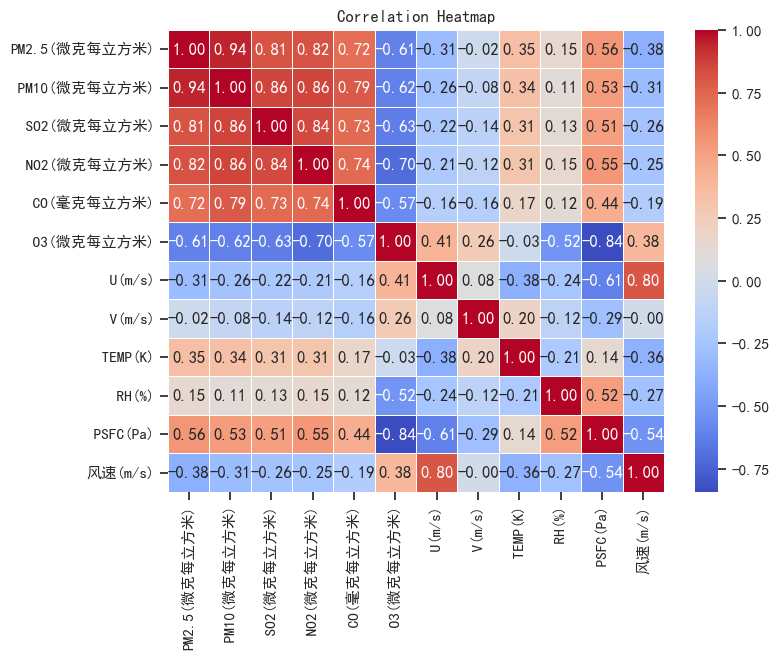

In [13]:
rc = {'font.sans-serif': 'SimHei', 'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)

# 使用corr()计算相关系数矩阵
selected_data = data.iloc[:,0:12]
corr_matrix = selected_data.corr()

# 使用Seaborn绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


In [15]:
selected_data

PM2.5(微克每立方米)   PM10(微克每立方米)   SO2(微克每立方米)   NO2(微克每立方米)  \
市    省                                                                   
[]   []            5.228387       5.823226      2.453871      1.201935   
     中华人民共和国      35.225000      49.620000     21.085000     22.295000   
     台湾省          27.100823      33.538101     11.513987      8.999873   
七台河市 黑龙江省         34.028462      37.815769     10.410769     15.180385   
万宁市  海南省          34.496667      41.508889     12.526667     11.834444   

               CO(毫克每立方米)   Unnamed: 0  
市    省                                  
[]   []          0.186129  1983.064516  
     中华人民共和国     0.480000   933.000000  
     台湾省         0.342975  1428.253165  
七台河市 黑龙江省        0.432308  3250.961538  
万宁市  海南省         0.334444    48.777778